In [172]:
# essential libraries
import random
from datetime import timedelta  

# storing and anaysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import calmap
import folium

# color pallette
cnf, dth, rec, act = '#393e46', '#ff2e63', '#21bf73', '#fe9801' 

# converter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()   

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# html embedding
from IPython.display import Javascript
from IPython.core.display import display
from IPython.core.display import HTML

In [173]:

full_table = pd.read_csv('D:\Jupyter Projects\covid_19_clean_complete.csv')
full_table.sample(6)


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
15986,NaN,Panama,8.53800,-80.782100,3/26/20,558,8,2
985,Northwest Territories,Canada,64.82550,-124.845700,1/25/20,0,0,0
4303,NaN,Ethiopia,9.14500,40.489700,2/8/20,0,0,0
1720,NaN,Laos,19.85627,102.495496,1/28/20,0,0,0
11777,Sint Maarten,Netherlands,18.04250,-63.054800,3/9/20,0,0,0
13500,NaN,Montenegro,42.50000,19.300000,3/16/20,0,0,0


In [174]:
full_table = pd.read_csv('D:\Jupyter Projects\covid_19_clean_complete.csv', parse_dates=['Date']) # to get into date format  









#sample_table["month"].astype('datetime64[M]')



In [175]:
#dataframe info
full_table.info()
full_table.describe()[full_table.columns[5:8]] # describe confirmed deats and recovered 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16055 entries, 0 to 16054
Data columns (total 8 columns):
Province/State    4875 non-null object
Country/Region    16055 non-null object
Lat               16055 non-null float64
Long              16055 non-null float64
Date              16055 non-null datetime64[ns]
Confirmed         16055 non-null int64
Deaths            16055 non-null int64
Recovered         16055 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 1003.5+ KB


,Confirmed,Deaths,Recovered
count,16055.000000,16055.000000,16055.000000
mean,435.497789,16.352102,144.815322
std,4139.044316,214.426702,2142.533470
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,20.000000,0.000000,1.000000
max,83836.000000,8215.000000,61201.000000


In [176]:
# checking total no missing value
print(full_table.isna().sum())



Province/State    11180
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64


In [177]:
year_wanted=2020


#sample_table=full_table.sample(3)

sample_table=full_table

#print(sample_table)

#sample_table["month"]=sample_table["Date"].dt.to_period('M') # gives both month n year

print(pd.DatetimeIndex(sample_table['Date']).year)

# extract the year and month 
sample_table["year"]=pd.DatetimeIndex(sample_table['Date']).year
sample_table["month"]=pd.DatetimeIndex(sample_table['Date']).month 

# print(sample_table["year"].equals(year_wanted))


sample_table.info()
print(" \n\n")
print(sample_table.loc[sample_table['year'] == year_wanted])
sample_table.info()

Int64Index([2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020,
            ...
            2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020],
           dtype='int64', name='Date', length=16055)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16055 entries, 0 to 16054
Data columns (total 10 columns):
Province/State    4875 non-null object
Country/Region    16055 non-null object
Lat               16055 non-null float64
Long              16055 non-null float64
Date              16055 non-null datetime64[ns]
Confirmed         16055 non-null int64
Deaths            16055 non-null int64
Recovered         16055 non-null int64
year              16055 non-null int64
month             16055 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(5), object(2)
memory usage: 1.2+ MB
 


                     Province/State          Country/Region        Lat  \
0                               NaN             Afghanistan  33.000000   
1                               NaN     

In [178]:
#Perform Grouping by months 
grp=sample_table.groupby('month')

print(grp["Confirmed"].sum())

month
1      38534
2    1673291
3    5280092
Name: Confirmed, dtype: int64


<BarContainer object of 16055 artists>

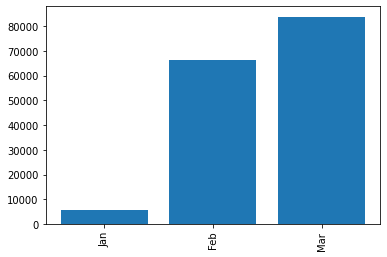

In [185]:
x = [0,1,2,3]
labels = ["start",'Jan', 'Feb', "Mar"]
#plt.plot(x,y, 'r')
plt.xticks(x, labels, rotation='vertical')

plt.bar(sample_table["month"], sample_table["Confirmed"])

<BarContainer object of 16055 artists>

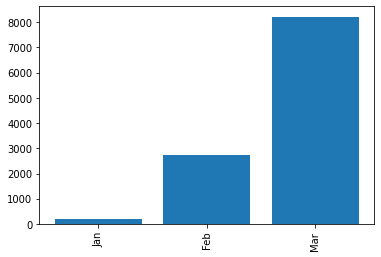

In [180]:
#plt.text(8,3,'This text ends at point (8,3)',horizontalalignment='right')

#plt.xticks(np.arange(1,4,1))

#plt.set_xticklabels(["Jan","Feb","Mar"])
x = [0,1,2,3]
labels = ["start",'Jan', 'Feb', "Mar"]
#plt.plot(x,y, 'r')
plt.xticks(x, labels, rotation='vertical')


plt.bar(sample_table["month"], sample_table["Deaths"])



<BarContainer object of 16055 artists>

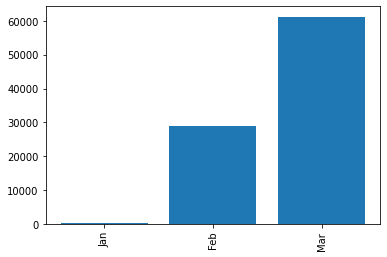

In [181]:
x = [0,1,2,3]
labels = ["start",'Jan', 'Feb', "Mar"]
#plt.plot(x,y, 'r')
plt.xticks(x, labels, rotation='vertical')

plt.bar(sample_table["month"], sample_table["Recovered"])

In [182]:
# cases 
cases = ['Confirmed', 'Deaths', 'Recovered', 'Active']

# Active Case = confirmed - deaths - recovered
full_table['Active'] = full_table['Confirmed'] - full_table['Deaths'] - full_table['Recovered']

# replacing Mainland china with just China
full_table['Country/Region'] = full_table['Country/Region'].replace('Mainland China', 'China')

# filling missing values 
full_table[['Province/State']] = full_table[['Province/State']].fillna('-')
full_table[cases] = full_table[cases].fillna(0)

# fixing datatypes
#print(full_table.info())
#full_table['Recovered'] = full_table['Recovered'].astype(int)
#print(full_table.info())

full_table.sample(20)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,year,month,Active
14337,Queensland,Australia,-28.0167,153.4000,2020-03-20,184,0,8,2020,3,176
7017,-,Eritrea,15.1794,39.7823,2020-02-19,0,0,0,2020,2,0
2381,-,Mexico,23.6345,-102.5528,2020-01-31,0,0,0,2020,1,0
5472,Manitoba,Canada,53.7609,-98.8139,2020-02-13,0,0,0,2020,2,0
9551,-,Nepal,28.1667,84.2500,2020-02-29,1,0,1,2020,2,0
13689,-,Ethiopia,9.1450,40.4897,2020-03-17,5,0,0,2020,3,5
5964,British Columbia,Canada,49.2827,-123.1207,2020-02-15,4,0,0,2020,2,4
405,-,Mexico,23.6345,-102.5528,2020-01-23,0,0,0,2020,1,0
3784,Xinjiang,China,41.1129,85.2401,2020-02-06,36,0,0,2020,2,36
9059,Curacao,Netherlands,12.1696,-68.9900,2020-02-27,0,0,0,2020,2,0


In [183]:
# cases in the ships
ship = full_table[full_table['Province/State'].str.contains('Grand Princess')|full_table['Country/Region'].str.contains('Diamond Princess')]

# china and the row
china = full_table[full_table['Country/Region']=='China']
row = full_table[full_table['Country/Region']!='China']

# latest
full_latest = full_table[full_table['Date'] == max(full_table['Date'])].reset_index()
china_latest = full_latest[full_latest['Country/Region']=='China']
row_latest = full_latest[full_latest['Country/Region']!='China']

# latest condensed
full_latest_grouped = full_latest.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
china_latest_grouped = china_latest.groupby('Province/State')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
row_latest_grouped = row_latest.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()